## Overview of Dataset
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository):

CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS - proportion of non-retail business acres per town. <br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
NOX - nitric oxides concentration (parts per 10 million) <br>
RM - average number of rooms per dwelling <br>
AGE - proportion of owner-occupied units built prior to 1940 <br>
DIS - weighted distances to five Boston employment centres <br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per 10,000 doller <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - % lower status of the population <br>
MEDV - Median value of owner-occupied homes in 1000's dollers


## Dataset: Boston House Prices
Link: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

## Step 01: Import all the required Libraries

Let's load the necessary libraries and data and start coding.
- <strong>NumPy</strong> : stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.
- <strong>Pandas</strong> : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- <strong>Sklearn</strong> : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- <strong>Pickle</strong> : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- <strong>Matplotlib</strong> : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- <strong>Seaborn</strong> : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')

## Step 02: Read all the required Data
In this stage we are going to read our problem dataset and have a look on it.

In [2]:
# Loading the data in pandas dataframe
try: 
    data = pd.read_csv('Boston Housing Dataset.csv')
    print("Data Reading Done Successfully....")
    
except (FileNotFoundError, IOError):
    print("Wrong File or File path")

Data Reading Done Successfully....


After we read the data, we can look at the data using:

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## Step 03: Data Exploration
Now we explore the data using different techniques..

In [5]:
# Checking the rows and columns of the dataset
print (f'The train data has {data.shape[0]} rows and {data.shape[1]} columns')

The train data has 506 rows and 14 columns


In [6]:
# Getting more insights of the data using .info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# Statistic of the dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Let's check if the data set has any missing values.

In [8]:
# Chcek Missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As we can see there is no missing value present in the dataset

#### Now let's chcek the distribution of the target varibale

In [9]:
# Function for Q-Q plot to chcek wether the target feature is normally distributed or not
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist='norm', plot=pylab)

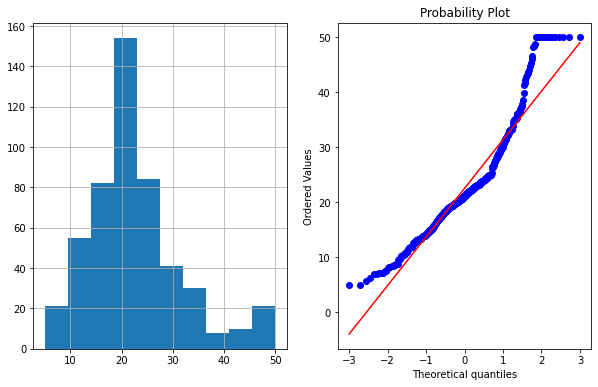

In [10]:
plot_data(data, 'MEDV')

As we can see that the data is normolly distributed.

#### Exploring other features..

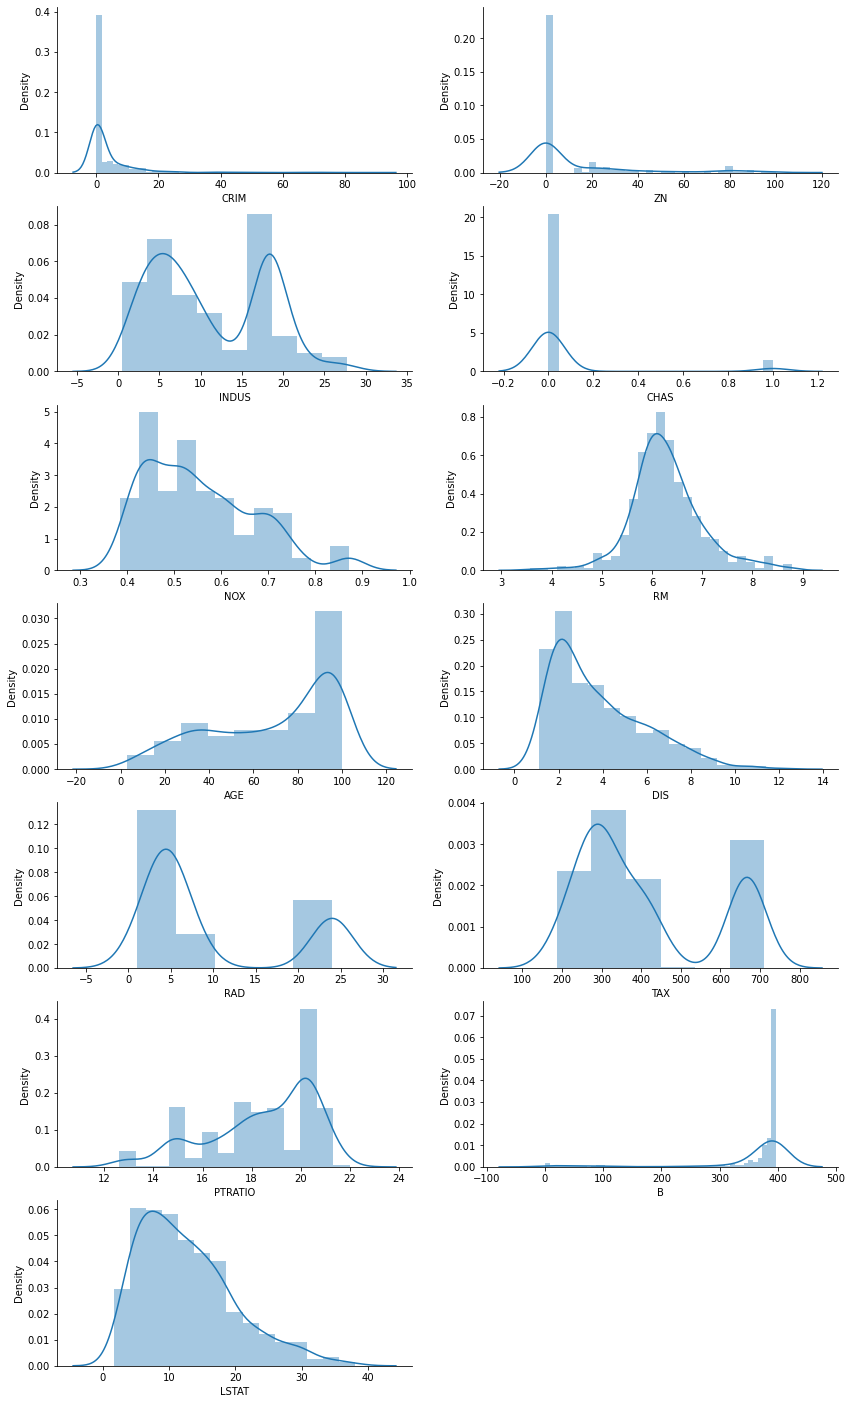

In [11]:
# Create a figure instance, and the subplots
fig = plt.figure(figsize=(14,25))

col = data.drop(columns=['MEDV'])

for i in range(1, len(list(col))+1):
    sns.distplot(data[col.columns[i-1]], ax=fig.add_subplot(7,2,i))
    
sns.despine()
plt.show()

Here we can see that the data has the different ranges.

<AxesSubplot:>

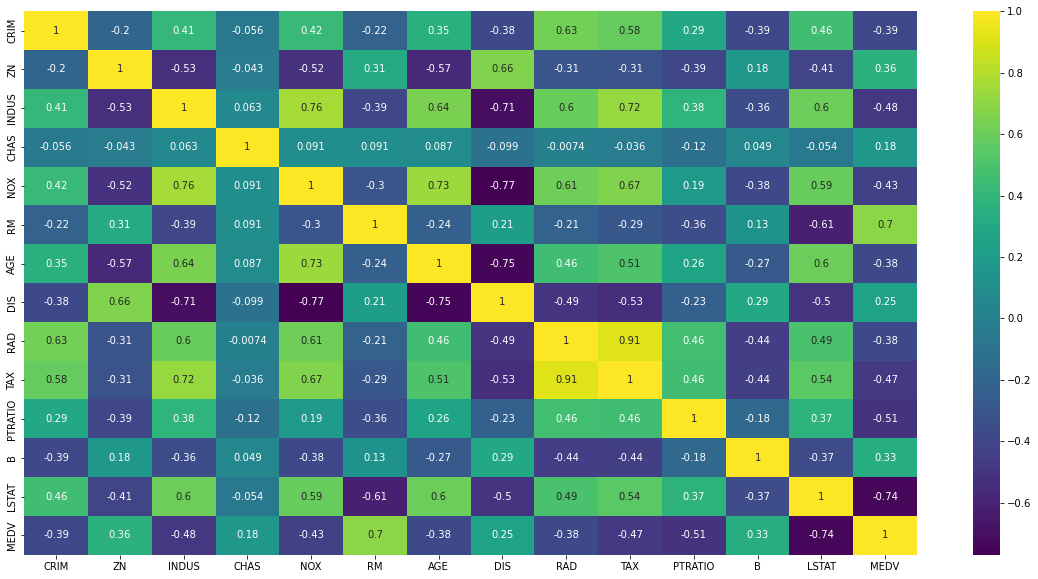

In [12]:
# Correlation map to check multicolinearity
plt.rcParams['figure.figsize'] = (20.0, 10.0)
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='viridis')

## Step 04: Data Pre-Processing
Make data ready for Machine Learning model...

In [13]:
# Separate the other features and the target fetaures
X = data.drop(columns=['MEDV'])
y = data['MEDV']

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Step 5: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.

- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [16]:
# Splitting the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [17]:
#display the shapes of the x and y train and test dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


## Step 6: Train the Model using Random Forest Regressor

### Linear Regression

In [18]:
# Importing and Creating the instance of the Linear Regression, fit the model and Make the prediction for test data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
y_pred

array([12.07495986, 26.9894969 , 17.58803353, 18.15584511, 36.92091659,
       25.43267386, 31.09256932, 19.72549907, 19.66103377, 22.96358632,
       28.38841214, 28.48925986, 18.99690357, 32.41097504, 21.52350275,
       15.25945122, 21.23364112, 11.6220597 , 11.37109662, 13.63515584,
        5.62431971, 17.35323315, 20.80951594, 22.51311312, 16.39055556,
       20.32352451, 17.88994185, 14.23445109, 21.1187098 , 17.50765806,
       14.54295525, 23.63289896, 34.32419647, 22.23027161, 16.82396516,
       20.16274383, 30.67665825, 35.61882904, 23.50372003, 24.66451121,
       36.91269871, 32.33290254, 19.11785719, 32.19546605, 33.42795148,
       25.52705821, 40.63477427, 18.21762788, 19.34587461, 23.80167377,
       33.42122982, 26.1451108 , 18.10363121, 28.19906437, 13.37486655,
       23.34019279, 24.44952678, 33.54973856, 16.71263275, 36.56402224,
       15.69684554, 18.55447039, 32.14543203, 15.49568061, 39.02363234,
       27.38174402, 31.96333419, 10.09436162, 19.13214621, 21.73

In [19]:
# Tesing the accuracy score of the model
print(f"The accuracy score of the model is: {round(lin_reg.score(X_test, y_test), 2)*100}%")

The accuracy score of the model is: 73.0%


In [20]:
data.iloc[1,:-1]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
Name: 1, dtype: float64

In [21]:
lin_reg.predict(data.iloc[1,:-1].values.reshape(1, 13))

array([24.73086061])

In [22]:
y[1]

21.6

## Step 7: Save the model in a pickle file
As model is giving very good accuracy we'll go with it and save it to pickle file. We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream.

In [23]:
# Save the model to disk
pickle.dump(lin_reg, open('model.pkl', 'wb'))

## Summary
Now our model is ready and whenever we need to make prediction, we just load the model using pickle and make the predictions.

In [24]:
reg = pickle.load(open('model.pkl', 'rb'))

In [25]:
reg.predict(data.iloc[1,:-1].values.reshape(1, 13))

array([24.73086061])